# Modelos de Regresión: Lineal, Polinómica y Otros

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, Lars, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

sns.set(style='whitegrid')

## Cargar datos

In [2]:
data_file = 'data/eda_data.csv'
df = pd.read_csv(data_file)

## Preprocesar datos

In [3]:
X = df['cord_x']
Y = df['cord_y']
z = df['track_id']


X = X.values.reshape(-1, 1)
Y = Y.values.reshape(-1, 1)
z = z.values.reshape(-1, 1)  


X = X.astype('float32')
Y = Y.astype('float32')
z = z.astype('float32')

X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, Y, z, test_size=0.2, random_state=42)

In [4]:
def plot_regression(x_train, y_train, x_test, y_test, y_pred, title):
    plt.scatter(X_train, y_train, color='blue', label='Training Data')
    plt.scatter(X_test, y_test, color='red', label='Test Data')
    plt.plot(X_test, y_pred, color='green', linewidth=3, label=title)
    
    plt.title(title)
    plt.xlabel('Cord X')
    plt.ylabel('Cord Y')
    plt.legend()
    
    plt.show()

# Regresión Lineal Simple

## Entrenar y evaluar el modelo

In [5]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred_lr = linear_reg.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"R2 del modelo de Regresión Lineal: {r2_lr}")
print(f"Error cuadrático medio del modelo de Regresión Lineal: {mse_lr}")

R2 del modelo de Regresión Lineal: 0.01255732774734497
Error cuadrático medio del modelo de Regresión Lineal: 35127.8125


# Regresión Polinómica

## Entrenar y evaluar el modelo

In [6]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_poly)

y_pred_poly = poly_reg.predict(X_test_poly)

mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
print(f"R2 del modelo de Regresión Polinómica: {r2_poly}")
print(f"Error cuadrático medio del modelo de Regresión Polinómica: {mse_poly}")

R2 del modelo de Regresión Polinómica: 0.014175653457641602
Error cuadrático medio del modelo de Regresión Polinómica: 35070.2421875


# Regresión con Stochastic Gradient Descent (SGD)

## Entrenar y evaluar el modelo

In [7]:
sgd_reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
sgd_reg.fit(X_train, y_train)

y_pred_sgd = sgd_reg.predict(X_test)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)
print(f"R2 del modelo de Regresión con SGD: {r2_sgd}")
print(f"Error cuadrático medio del modelo de Regresión con SGD: {mse_sgd}")

R2 del modelo de Regresión con SGD: 0.012324417373746566
Error cuadrático medio del modelo de Regresión con SGD: 35136.09726356983


C:\Users\mikeb\OneDrive\Escritorio\Proyectos\Python\proyecto-ia-arch\venv\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Regresión Ridge

## Entrenar y evaluar el modelo

In [8]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

y_pred_ridge = ridge_reg.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R2 del modelo de Regresión Ridge: {r2_ridge}")
print(f"Error cuadrático medio del modelo de Regresión Ridge: {mse_ridge}")

R2 del modelo de Regresión Ridge: 0.01255732774734497
Error cuadrático medio del modelo de Regresión Ridge: 35127.8125


# Regresión Lasso

## Entrenar y evaluar el modelo

In [9]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)

y_pred_lasso = lasso_reg.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R2 del modelo de Regresión Lasso: {r2_lasso}")
print(f"Error cuadrático medio del modelo de Regresión Lasso: {mse_lasso}")

R2 del modelo de Regresión Lasso: 0.012559294700622559
Error cuadrático medio del modelo de Regresión Lasso: 35127.7421875


# Regresión ElasticNet

## Entrenar y evaluar el modelo

In [10]:
elasticnet_reg = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train)

y_pred_elasticnet = elasticnet_reg.predict(X_test)

mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
print(f"R2 del modelo de Regresión ElasticNet: {r2_elasticnet}")
print(f"Error cuadrático medio del modelo de Regresión ElasticNet: {mse_elasticnet}")

R2 del modelo de Regresión ElasticNet: 0.012558341026306152
Error cuadrático medio del modelo de Regresión ElasticNet: 35127.77734375


# Regresión LARS

## Entrenar y evaluar el modelo

In [11]:
lars_reg = Lars()
lars_reg.fit(X_train, y_train)

y_pred_lars = lars_reg.predict(X_test)

mse_lars = mean_squared_error(y_test, y_pred_lars)
r2_lars = r2_score(y_test, y_pred_lars)
print(f"R2 del modelo de Regresión LARS: {r2_lars}")
print(f"Error cuadrático medio del modelo de Regresión LARS: {mse_lars}")

R2 del modelo de Regresión LARS: 0.01255732774734497
Error cuadrático medio del modelo de Regresión LARS: 35127.8125


# Visualización de Resultados

## Comparación de Modelos

In [12]:
results = {
    'Modelo': ['Regresión Lineal', 'Regresión Polinómica', 'Regresión con SGD', 'Regresión Ridge', 'Regresión Lasso', 'Regresión ElasticNet', 'Regresión LARS'],
    'R2 Score': [r2_lr, r2_poly, r2_sgd, r2_ridge, r2_lasso, r2_elasticnet, r2_lars],
    'MSE': [mse_lr, mse_poly, mse_sgd, mse_ridge, mse_lasso, mse_elasticnet, mse_lars],
    'y_pred': [y_pred_lr,y_pred_poly, y_pred_sgd, y_pred_ridge, y_pred_lasso, y_pred_elasticnet, y_pred_lars]
}
results_df = pd.DataFrame(results)

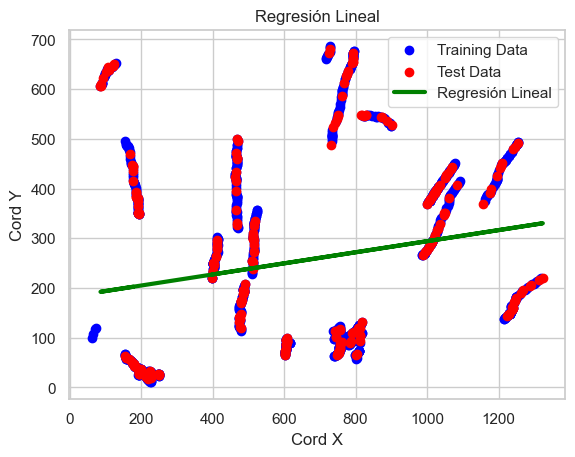

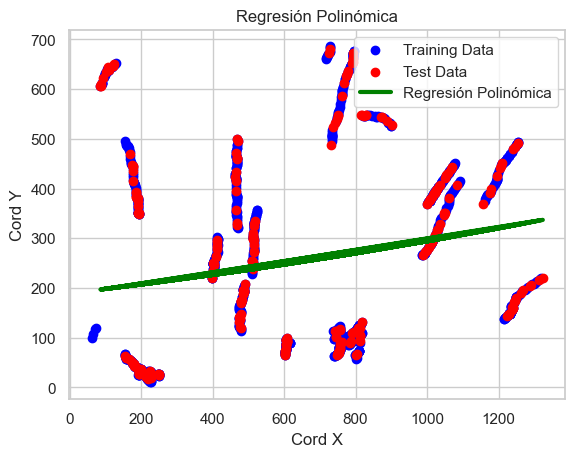

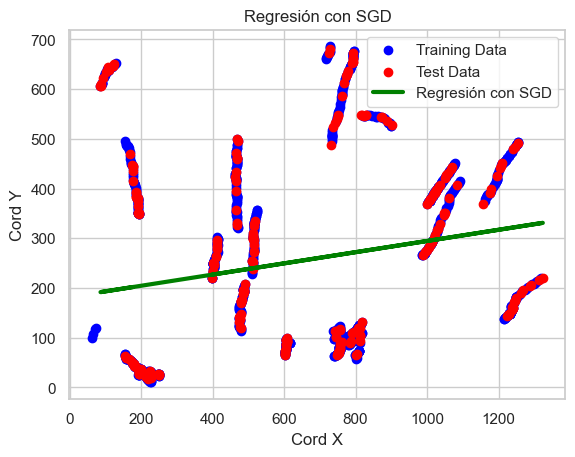

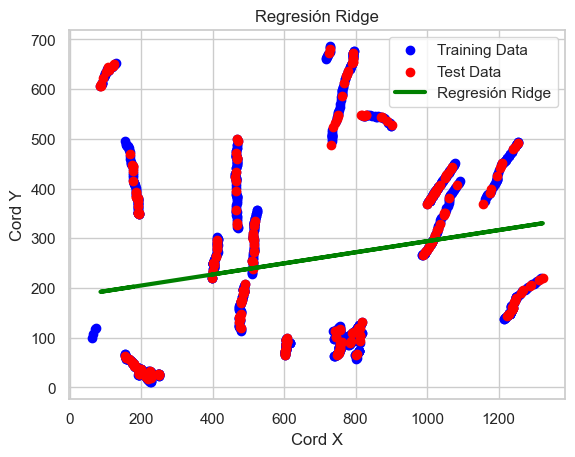

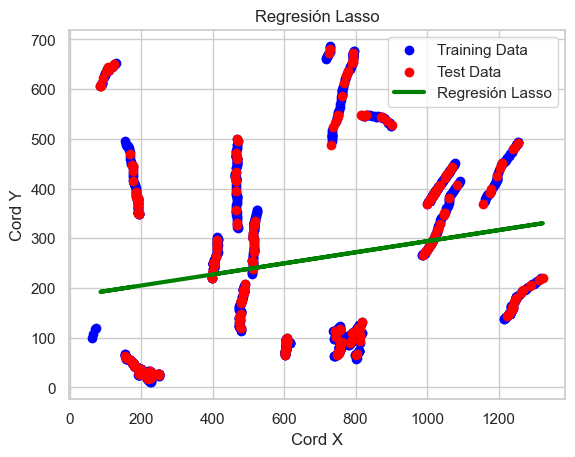

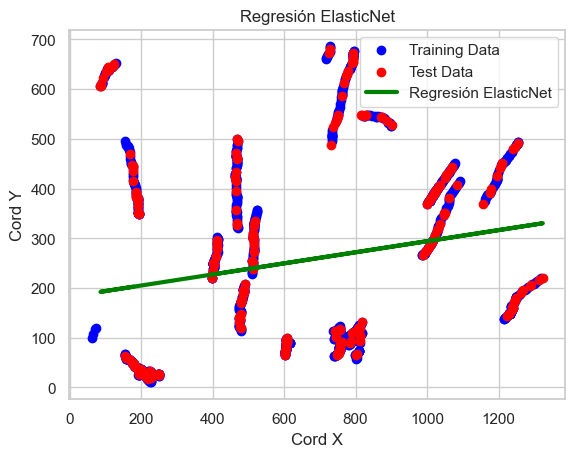

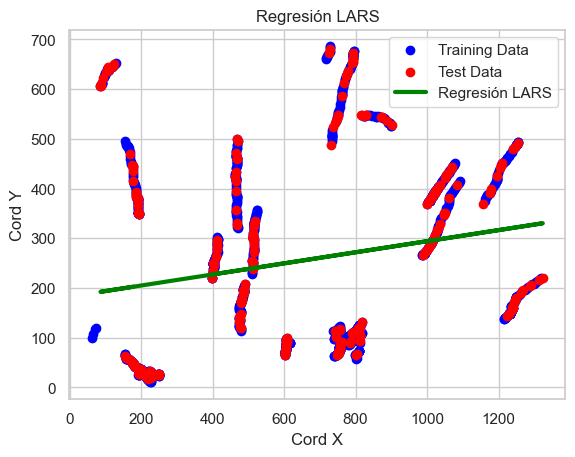

In [13]:
for i in range(len(results['Modelo'])):
    plot_regression(X_train, y_train, X_test, y_test,results['y_pred'][i],results['Modelo'][i])

### Gráfico de R2 Scores

C:\Users\mikeb\AppData\Local\Temp\ipykernel_32340\2743168766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Modelo', data=results_df, palette='viridis')


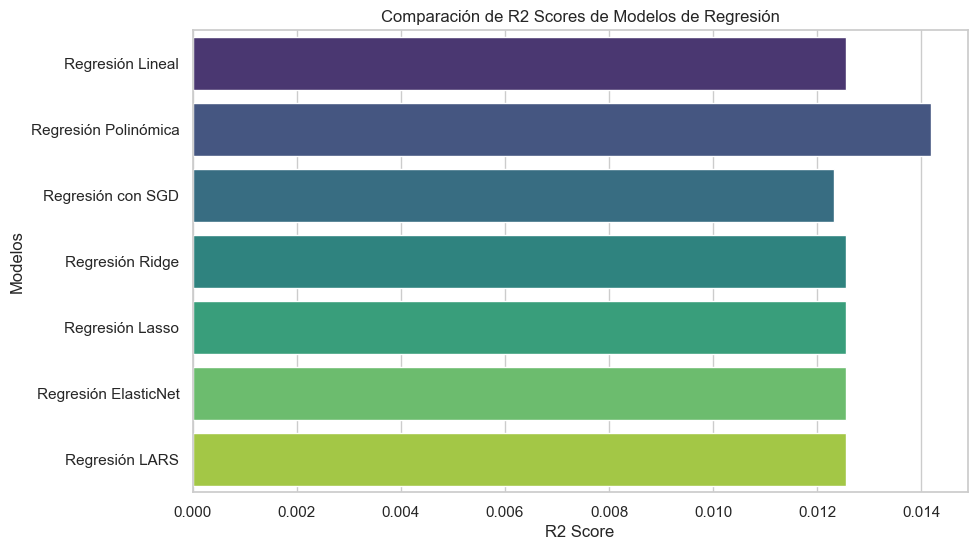

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 Score', y='Modelo', data=results_df, palette='viridis')
plt.title('Comparación de R2 Scores de Modelos de Regresión')
plt.xlabel('R2 Score')
plt.ylabel('Modelos')
plt.show()

### Gráfico de MSE

C:\Users\mikeb\AppData\Local\Temp\ipykernel_32340\26826044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSE', y='Modelo', data=results_df, palette='viridis')


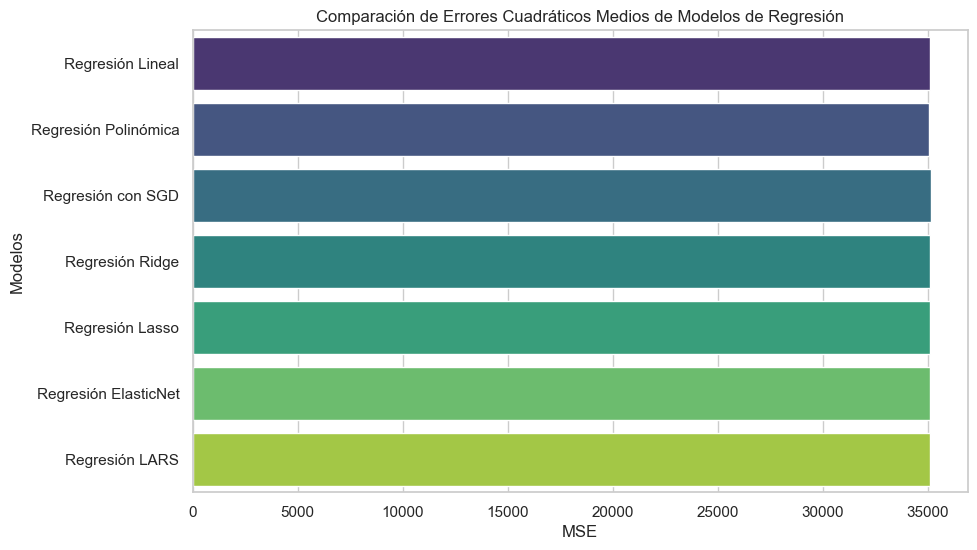

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='MSE', y='Modelo', data=results_df, palette='viridis')
plt.title('Comparación de Errores Cuadráticos Medios de Modelos de Regresión')
plt.xlabel('MSE')
plt.ylabel('Modelos')
plt.show()